<a href="https://colab.research.google.com/github/andreidore/FSM/blob/master/pytorch/pytorch_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools

In [2]:
train_dataset=torchvision.datasets.MNIST(root=".",train=True,transform=transforms.ToTensor(),download=True)

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [4]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [5]:
train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [6]:
train_dataset.targets

tensor([5, 0, 4,  ..., 5, 6, 8])

In [7]:
test_dataset=torchvision.datasets.MNIST(root=".",train=False,transform=transforms.ToTensor(),download=True)

In [8]:
test_dataset.data.shape

torch.Size([10000, 28, 28])

In [9]:
model=nn.Sequential(
    nn.Linear(784,128),
    nn.ReLU(),
    nn.Linear(128,10) 
)

In [12]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cuda


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [13]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [14]:
batch_size=128

train_loader=torch.utils.data.DataLoader(dataset=train_dataset,
                                         batch_size=batch_size,
                                         shuffle=True)

test_loader=torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size,
                                         shuffle=False)


In [15]:
tmp_loader=torch.utils.data.DataLoader(dataset=train_dataset,
                                       batch_size=1,
                                       shuffle=True)

for x,y in tmp_loader:
  print(x.shape)
  print(y.shape)
  break

torch.Size([1, 1, 28, 28])
torch.Size([1])


In [18]:
n_epochs = 10

train_losses= np.zeros(n_epochs)
test_losses= np.zeros(n_epochs)


for it in range(n_epochs):

  train_loss=[]

  for inputs,targets in train_loader:
    inputs,targets=inputs.to(device),targets.to(device)

    inputs=inputs.view(-1,784)

    optimizer.zero_grad()

    outputs=model(inputs)
    loss=criterion(outputs,targets)

    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())

  test_loss=[]

  for inputs,targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)

    inputs=inputs.view(-1,784)

    outputs=model(inputs)
    loss=criterion(outputs,targets)

    test_loss.append(loss.item())

  train_losses[it]=np.mean(train_loss)
  test_losses[it]=np.mean(test_loss)

  print(f"Epoch {it+1}/{n_epochs} Train_loss:{np.mean(train_loss):.4f} Test_loss:{np.mean(test_loss):.4f}")






Epoch 1/10 Train_loss:0.1415 Test_loss:0.1287
Epoch 2/10 Train_loss:0.1111 Test_loss:0.1105
Epoch 3/10 Train_loss:0.0894 Test_loss:0.0999
Epoch 4/10 Train_loss:0.0747 Test_loss:0.0914
Epoch 5/10 Train_loss:0.0625 Test_loss:0.0872
Epoch 6/10 Train_loss:0.0534 Test_loss:0.0809
Epoch 7/10 Train_loss:0.0454 Test_loss:0.0784
Epoch 8/10 Train_loss:0.0384 Test_loss:0.0799
Epoch 9/10 Train_loss:0.0329 Test_loss:0.0736
Epoch 10/10 Train_loss:0.0278 Test_loss:0.0764


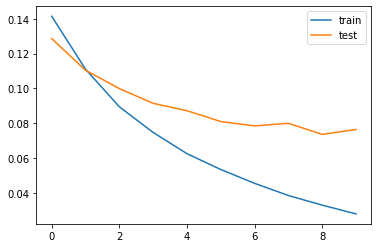

In [19]:
plt.plot(train_losses,label="train")
plt.plot(test_losses,label="test")
plt.legend()
plt.show()

In [20]:
n_correct=0.
n_total=0.

for inputs,targets in train_loader:

  inputs,targets = inputs.to(device), targets.to(device)

  inputs=inputs.view(-1,784)

  outputs=model(inputs)

  _,predictions=torch.max(outputs,1)

  n_correct +=(predictions==targets).sum().item()
  n_total+=targets.shape[0]


train_acc=n_correct/n_total

n_correct=0.
n_total=0.

for inputs,targets in test_loader:

  inputs,targets = inputs.to(device), targets.to(device)

  inputs=inputs.view(-1,784)

  outputs=model(inputs)

  _,predictions=torch.max(outputs,1)

  n_correct +=(predictions==targets).sum().item()
  n_total+=targets.shape[0]

test_acc=n_correct/n_total

print(train_acc, test_acc)


0.9941166666666666 0.9783


In [ ]:
def plot_confusion_matrix(cm, classes, normalize=False, title="Confusion Matrix", cmap=plt.cm.Blues):

  if normalize:
    cm=cm.astype("float")/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("No normalized")

    